# Activity: Hypothesis testing with Python

## **Introduction**


As you've been learning, analysis of variance (commonly called ANOVA) is a group of statistical techniques that test the difference of means among three or more groups. It's a powerful tool for determining whether population means are different across groups and for answering a wide range of business questions.

In this activity, you are a data professional working with historical marketing promotion data. You will use the data to run a one-way ANOVA and a post hoc ANOVA test. Then, you will communicate your results to stakeholders. These experiences will help you make more confident recommendations in a professional setting. 

In your dataset, each row corresponds to an independent marketing promotion, where your business uses TV, social media, radio, and influencer promotions to increase sales. You have previously provided insights about how different promotion types affect sales; now stakeholders want to know if sales are significantly different among various TV and influencer promotion types.

To address this request, a one-way ANOVA test will enable you to determine if there is a statistically significant difference in sales among groups. This includes:
* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs and communicating the results to nontechnical stakeholders

## **Step 1: Imports** 


Import pandas, pyplot from matplotlib, seaborn, api from statsmodels, ols from statsmodels.formula.api, and pairwise_tukeyhsd from statsmodels.stats.multicomp.

In [1]:
# Import libraries and packages.

### YOUR CODE HERE ### 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ### 
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.

### YOUR CODE HERE ### 
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


The features in the data are:
* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)

**Question:** Why is it useful to perform exploratory data analysis before constructing a linear regression model?

[Write your response here. Double-click (or enter) to edit.]

## **Step 2: Data exploration** 


First, use a boxplot to determine how `Sales` vary based on the `TV` promotion budget category.

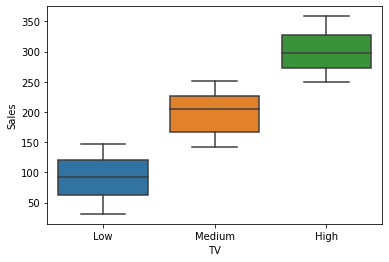

In [3]:
# Create a boxplot with TV and Sales.

### YOUR CODE HERE ### 
sns.boxplot(x=data['TV'],y=data['Sales'])

**Question:** Is there variation in `Sales` based off the `TV` promotion budget?

ZY: Yes, when ordering the TV by order of Low, Medium, and High, it is quite evident that sales vary based on TV groups. The median sale for each TV group is higher than the previous.

Now, use a boxplot to determine how `Sales` vary based on the `Influencer` size category.

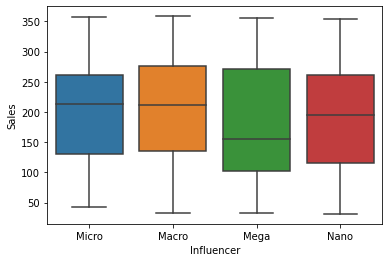

In [4]:
# Create a boxplot with Influencer and Sales.

### YOUR CODE HERE ### 
sns.boxplot(x=data['Influencer'], y=data['Sales'])

**Question:** Is there variation in `Sales` based off the `Influencer` size?

ZY: There is not much variation in Sales based off Influencer size as most of the medians are between 150 and 250. All 4 groups have same min and max.

### Remove missing data

You may recall from prior labs that this dataset contains rows with missing values. To correct this, drop these rows. Then, confirm the data contains no missing values.

In [5]:
# Drop rows that contain missing data and update the DataFrame.

### YOUR CODE HERE ### 
data = data.dropna()

# Confirm the data contains no missing values.

### YOUR CODE HERE ### 
data.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

## **Step 3: Model building** 


Fit a linear regression model that predicts `Sales` using one of the independent categorical variables in `data`. Refer to your previous code for defining and fitting a linear regression model.

In [6]:
# Define the OLS formula.

### YOUR CODE HERE ### 
ols_formula = 'Sales ~ C(TV)'

# Create an OLS model.

### YOUR CODE HERE ### 
OLS = ols(formula=ols_formula, data=data[['Sales','TV']])

# Fit the model.

### YOUR CODE HERE ### 
model = OLS.fit()

# Save the results summary.

### YOUR CODE HERE ### 
model_results = model.summary()

# Display the model results.

### YOUR CODE HERE ### 
print(model_results)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          8.81e-256
Time:                        09:24:17   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    1

**Question:** Which categorical variable did you choose for the model? Why?

ZY: I chose TV over influencer as it is quite obvious that the different groups have different medians. 

### Check model assumptions

Now, check the four linear regression assumptions are upheld for your model.

**Question:** Is the linearity assumption met?

ZY: Yes, linearity assumption is met. When we order the data by TV groups, there is an upward trend in median sales values.

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

Next, verify that the normality assumption is upheld for the model.

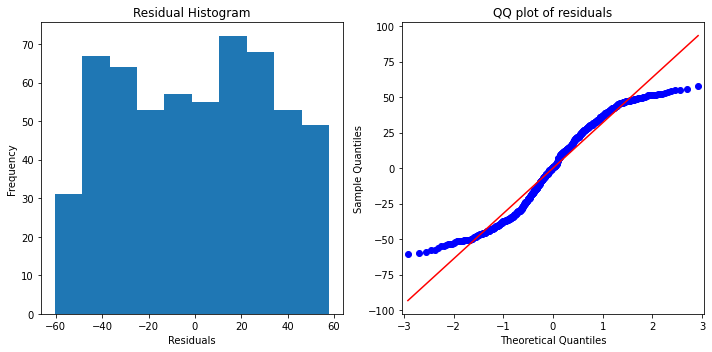

In [7]:
# Calculate the residuals.

### YOUR CODE HERE ### 
residuals = model.resid

# Create a histogram with the residuals. 

### YOUR CODE HERE ### 
fig, ax = plt.subplots(1,2,figsize=(10,5))

# Create a QQ plot of the residuals.

### YOUR CODE HERE ### 
ax[0].hist(residuals)
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Residual Histogram')
sm.qqplot(residuals, line='s', ax=ax[1])
ax[1].set_title('QQ plot of residuals')
plt.tight_layout()
plt.show()

**Question:** Is the normality assumption met?

ZY: No, on the QQ plot of residuals, the residuals look like it is follow a sigmoid curve rather than a diagonal line. Furthermore, histogram plot shows that it is somewhat uniform, except for residuals which are less than 60. Thus we can't assume that normality is met here.

Now, verify the constant variance (homoscedasticity) assumption is met for this model.

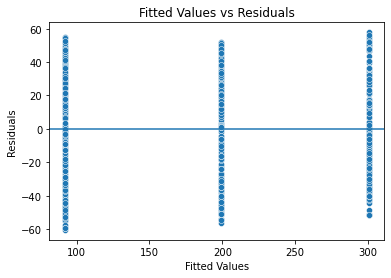

In [8]:
# Create a scatter plot with the fitted values from the model and the residuals.

### YOUR CODE HERE ### 
fitted_values = model.fittedvalues
fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.set_xlabel('Fitted Values')
fig.set_ylabel('Residuals')
fig.set_title('Fitted Values vs Residuals')
fig.axhline(0)
plt.show()

**Question:** Is the constant variance (homoscedasticity) assumption met?

ZY: Yes the constant variance assumption is met. Both 3 fited values for 3 different groups have residual variances that are roughly similar.

## **Step 4: Results and evaluation** 

First, display the OLS regression results.

In [9]:
# Display the model results summary.

### YOUR CODE HERE ### 
print(model_results)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          8.81e-256
Time:                        09:24:17   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    1

**Question:** What is your interpretation of the model's R-squared?

ZY: The categorical variable TV explains for 87.4% of the variance in Sales. 

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?

ZY: On average, TV group Low is 208.8133 units lower than the TV group High. Similarly, TV group medium is 101.5061 units lower than TV group High. All 3 coefficients are significant as p-value is lesser than the significance level of 0.05

**Question:** Do you think your model could be improved? Why or why not? How?

ZY: Yes it can probably be improved by introducing other features.

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups. 

In [10]:
# Create an one-way ANOVA table for the fit model.

### YOUR CODE HERE ### 
sm.stats.anova_lm(model,typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(TV),2.0,4.052692e+06,2.026346e+06,1971.455737,8.805550e-256
Residual,566.0,5.817589e+05,1.027843e+03,NaN,NaN


**Question:** What are the null and alternative hypotheses for the ANOVA test?

ZY:

H0: The mean sales values across all groups of TV is the same. <br>
H1: The mean sales values across all groups of TV is not the same.

**Question:** What is your conclusion from the one-way ANOVA test?

ZY: There is statistical significance showing that the mean sales value across the different groups of TV is different.

**Question:** What did the ANOVA test tell you?

ZY: Whether the means of one continuous dependent variable vs three or more groups of one categorical variable is different.

### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test. 

Run the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [11]:
# Perform the Tukey's HSD post hoc test.

### YOUR CODE HERE ### 
tukey_oneway = pairwise_tukeyhsd(endog=data['Sales'], groups=data['TV'],alpha=0.05)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.001,-216.637,-200.9896,True
High,Medium,-101.5061,0.001,-109.3204,-93.6918,True
Low,Medium,107.3072,0.001,99.7063,114.908,True


**Question:** What is your interpretation of the Tukey HSD test?

ZY: Pairwise comparison between all availabe groups while controlling for error rate. Groups Choose 2 number of rows.

Basically see the individual comparison of one group to all groups and seeing if we can reject the H0 that the mean of group1 = mean of group 2.

## **Considerations**

**What are some key takeaways that you learned during this lab?**

ZY: If you do not account for type 1 error while doing multiple hypothesis test, the probability of at least 1 type 1 error occuring rises quickly. To observe this, posthoc test to find out which groups means are different.

**What summary would you provide to stakeholders? Consider the statistical significance of key relationships and differences in distribution.**

ZY: Since all groups did show significant evidence that it does affect sales, the stakeholders can consider investing more into TV groups which are high to drive more sales.

#### **Reference**
[Saragih, H.S. *Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.